In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
data = pd.read_csv('Heart Disease data.csv', encoding = 'unicode_escape')

In [387]:
#DATA CLEANING
#data.head()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [388]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [389]:
pd.isnull(data).sum() #isnull will display boolean values( 0 for false, 1 for true. If sum is 0 which means there is no null value. 
#If there's an x sum which means x rows has null values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [390]:
# a. Check datatype
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [391]:
#Unique values of each column
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [392]:
#Sex : 0=Male, 1=Female : 2 values
#cp[Chest pain] :  0 :" typical_angina", 1:"atypical_angina" , 2: "non-anginal pain", 3: "asymtomatic"
#trestbps[resting blood pressure] : A normal BP is of 120/80 mmHg
#chol[Cholestrol]
#fts[Fasting Blood Pressure] = 1: "True", 0: "False"
#slope = 0 : "upsloping", 1: "flat", 2: "downsloping"
#thal = 1: "fixed_defect", 2 : "reversable_defect", 3 :"normal"
#target= 1 : "Disease", 0: "No_disease" 
#Rest ecg 0 : normal, 1:ST-T wave abnormality, 2 : left ventricular hypertrophy.
#thalach is max heart rate
#exang is exercise induced angina

In [393]:
#To find distinct values of a column
data['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [394]:
#To count the number of values in each category
data.ca.value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

In [395]:
#To display rows where ca = 4
data[data['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [396]:
#Ca ranges from 0-3 and 4 is invalid, hence lets change it to NaN
data.loc[data['ca'] == 4, 'ca'] = np.NaN

In [397]:
data['ca'].unique()


array([ 2.,  0.,  1.,  3., nan])

In [398]:
# thal ranges from 1-3
data['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [399]:
data.thal.value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [400]:
#There are 7 values for 0, hence change it to NaN
data.loc[data['thal'] == 0, 'thal'] = np.NaN

In [401]:
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [402]:
data['thal'].unique()

array([ 3.,  2.,  1., nan])

In [403]:
#Chexk missing values and replace them
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

In [404]:
data = data.fillna(data.median())
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [405]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.683902,2.337561,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,0.939365,0.590620,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [406]:
#Change the values with proper names
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({ 0 :" typical_angina", 1:"atypical_angina" , 2: "non-anginal pain", 3: "asymtomatic"})
data['exang'] = data.exang.replace({0: "No", 1: "yes"})
data['fbs'] = data.fbs.replace({1: "True", 0: "False"})
data['slope'] = data.slope.replace({0 : "upsloping", 1: "flat", 2: "downsloping"})
data['thal'] = data.thal.replace({ 1: "fixed_defect", 2 : "reversable_defect", 3 :"normal"})
data['target'] = data.target.replace({ 1 : "Disease", 0: "No_disease"})

In [407]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2.0,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,yes,3.1,upsloping,0.0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,yes,2.6,upsloping,0.0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1.0,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3.0,reversable_defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,atypical_angina,140,221,False,1,164,yes,0.0,downsloping,0.0,reversable_defect,Disease
1021,60,Male,typical_angina,125,258,False,0,141,yes,2.8,flat,1.0,normal,No_disease
1022,47,Male,typical_angina,110,275,False,0,118,yes,1.0,flat,1.0,reversable_defect,No_disease
1023,50,Female,typical_angina,110,254,False,0,159,No,0.0,downsloping,0.0,reversable_defect,Disease


In [408]:
#Data Visualization


In [409]:
#Plotting a bar chart for number of patients with disease and no disease
data.target.value_counts()


target
Disease       526
No_disease    499
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

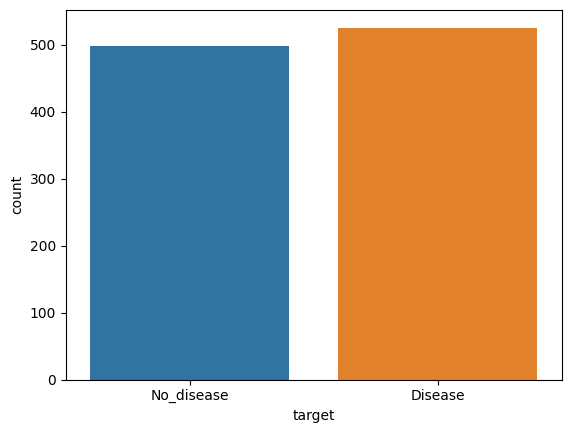

In [410]:
sns.countplot(x='target', data= data, hue='target')

<Axes: xlabel='target', ylabel='count'>

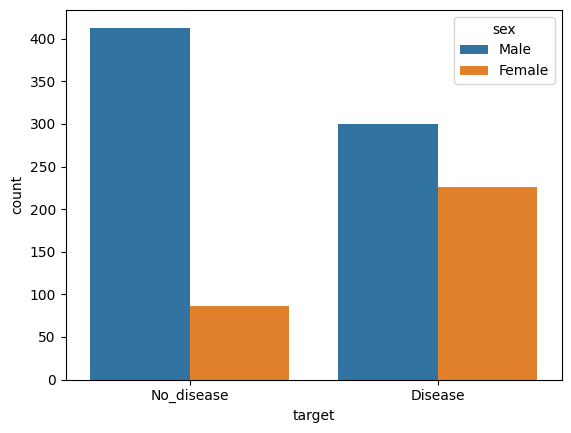

In [411]:
sns.countplot(x='target', data= data, hue='sex')

In [412]:
# WE SEE AROUND 526 PEOPLE OUT OF 1025 ARE AFFECTED WITH DISEASE
#we can observe that among disease patients, male are higher than female.

In [413]:
#SEX

In [414]:
data.sex.value_counts()

sex
Male      713
Female    312
Name: count, dtype: int64

In [415]:
disease = data[data['target'] == 'Disease']

In [416]:
#SEX value count who has got the disease
disease.sex.value_counts()

sex
Male      300
Female    226
Name: count, dtype: int64

<Axes: ylabel='count'>

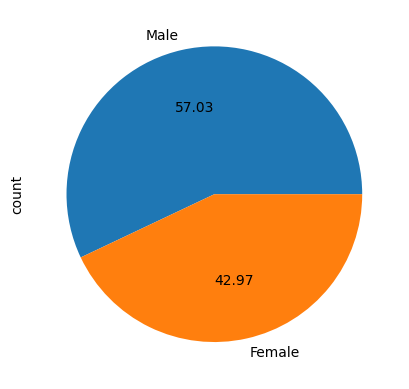

In [417]:
#Percentage of male patients vs female
disease['sex'].value_counts().plot.pie(autopct='%.2f')

In [418]:
#WE SEE AROUND 300 MALE AND 226 FEMALE ARE AFFECTED BY DISEASE.


In [419]:
#PAIN TYPE
data.cp.value_counts()


cp
 typical_angina     497
non-anginal pain    284
atypical_angina     167
asymtomatic          77
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='age'>

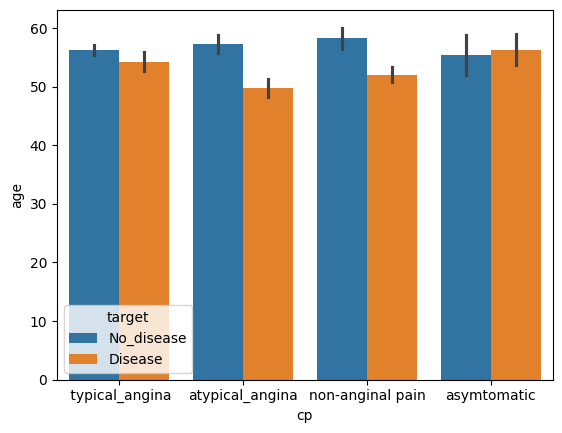

In [420]:
#Chest pain type based on target variable.
sns.barplot(y='age', x='cp', data=data, hue='target')

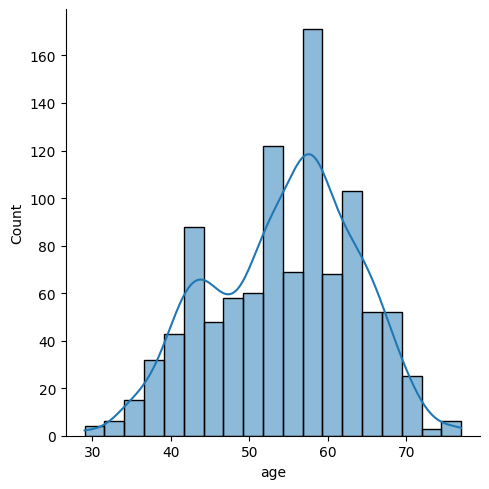

In [421]:
#Distribution of the age of the patients
sns.displot(data['age'], kde=True)

In [422]:
#FROM ABOVE GRAPH WE SEE THAT AGE GROUP BETWEEN 50 AND 60HAS GOT CHEST PAIN.

<Axes: xlabel='thal', ylabel='age'>

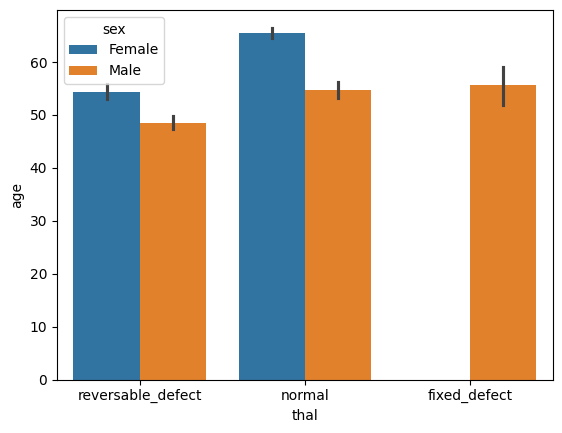

In [423]:
sns.barplot(x='thal', y='age', data=disease, hue='sex')

In [424]:
print(min(data.age))

29


In [425]:
print(max(data.age))

77


In [426]:
print(data.age.mean())

54.43414634146342


In [427]:
# WE SEE AROUND 526 PEOPLE OUT OF 1025 ARE AFFECTED WITH DISEASE
#It is observed that 300 male and 226 female are affected by disease.
#we can observe that among disease patients, male are higher than female.
#Most of the patients are in the age between 50s to 60s. 
#The mean age is about 54 years with ±9.08 std, the youngest is at 29 and the oldest is at 77.
